<a href="https://colab.research.google.com/github/sysyJEON/class_ai4ml/blob/main/ml_guide/ch07_Clustering_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7장

## 7.1 K-평균 알고리즘 이해

K-평균
- 군집화(Clustering)에서 가장 일반적으로 사용되는 알고리즘
- 군집 중심점(centroid)이라는 특정한 임의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법

군집 중심점
- 선택된 포인트의 평균 지점으로 이동
- 이동된 중심점에서 다시 가까운 포인트 선택
- 다시 중심점을 평균 지점으로 이동하는 프로세스를 반복적으로 수행
- 모든 데이터 포인트에서 더 이상 중심점의 이동이 없을 경우에 반복 멈추고 해당 중심점에 속하는 데이터 포인트들을 군집화

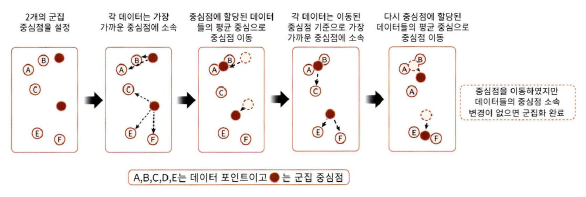

K-평균 장점
- 일반적인 군집화에서 가장 많이 활용되는 알고리즘
- 쉽고 간결

K-평균 단점
- 거리 기반 알고리즘으로 속성의 개수 매우 많을 경우 군집화 정확도 떨어짐(이를 위해 PCA로 차원 감소 적용해야 할 수 도 있음)
- 반복 수행하는데, 반복 횟수 많을 경우 수행 시간 매우 느려짐
- 몇 개의 군집을 선택해야 할지 가이드하기 어려움

### K-평균을 이용한 붓꽃 데이터 세트 군집화

꽃받침(sepal), 꽃잎(petal)의 길이에 따라 각 데이터의 군집화가 어떻게 결정되는지 확인해 보고, 이를 분류 값과 비교

In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


붓꽃 데이터 세트를 3개 그룹으로 군집화

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)
# n_cluster: 군집화 개수(군집 중심점의 개수), init: 초기에 군집 중심점의 좌표를 설정할 방식(일반적으로 k-means++ 방식으로 최초 설정), max_iter: 최대 반복 횟수(이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

kmeans의 labels_ 속성값 확인 -> irisDF의 각 데이터가 어떤 중심에 속하는지 알 수 있음

In [ ]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


실제 붓꽃 품종 분류 값과 얼마나 차이 나는지로 군집화가 효과적으로 됐는지 확인
- 데이터 세트의 target 값을 'target' 칼럼으로
- 앞에서 구한 labels_ 값을 'cluster' 칼럼으로 지정
- irisDF DataFrame에 추가
- group by 연산을 실제 분류값인 target과 군집화 분류값인 cluster 레벨로 적용해 개수 비교

In [ ]:
irisDF['target'] = iris.target
irisDF['cluster']= kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          47
        2           3
2       0          14
        2          36
Name: sepal_length, dtype: int64


- 분류 타깃이 0값인 데이터는 1번 군집으로 모두 자 그루핑됨
- 타깃 1값 데이터는 2개만 2번 군집으로 그루핑됐고, 나머지 48개는 모두 0번 군집으로 그루핑됨
- 타깃 2값 데이터는 0번 군집에 14개, 2번 군집에 36개로 분산되어 그루핑됨

붓꽃 데이터 세트의 군집화를 시각화
- 데이터 세트의 속성이 4개이므로 2차원 평면에 적합치 않아 PCA를 이용해 4개의 속성을 2개로 차원 축소한 뒤 X좌표, Y좌표로 개별 데이터를 표현

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # 속성 2개로 차원 축소
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


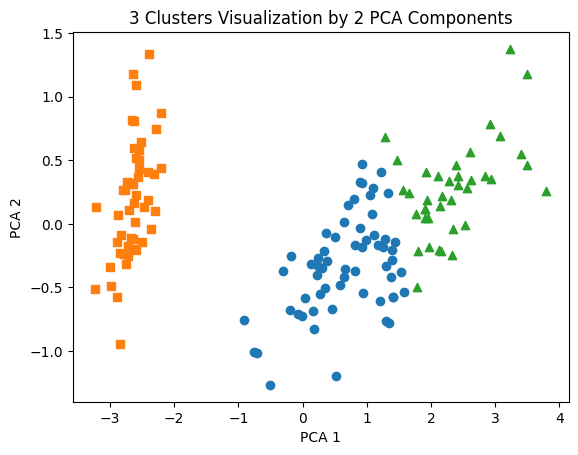

In [ ]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

### 군집화 알고리즘 테스트를 위한 데이터 생성

사이킷런은 다양한 유형의 군집화 알고리즘을 테스트 하기 위한 간단한 데이터 생성기 제공
- `make_blobs()`: 개별 군집의 중심점과 표준 편차 제어 기능이 추가됨
- `make_classification()`: 노이즈를 포함한 데이터를 만드는 데 유용하게 사용

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
# n_samples: 생성할 총 데이터 개수(디폴트 100개), n_features: 데이터 피처 개수, 시각화 목표할 경우 2개로 설정해 보통 첫 번째 피처는 x좌표, 두 번째 피처는 y 좌표상에 표현
# centers: int 값으로 설정하면 군집의 개수, ndarray 형태로 표현하면 개별 군집 중심점의 좌표
# cluster_std: 생성될 군집 데이터의 표준 편차
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


- 피처 데이터 세트 X: 200개 레코드와 2개 피처를 가지므로 (200, 2)
- 군집 타깃 데이터 세트 y: (200,)
- 3개의 cluster의 값은 [0, 1, 2]이며 각각 66, 67, 66개로 균일하게 구성됨

데이터 세트를 DataFrame으로 변경
- 피처의 이름은 ftr1, ftr2

In [ ]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


`make_blob()`으로 만든 피처 데이터 세트가 어떠한 군집 무포 가지고 만들어졌는지 확인

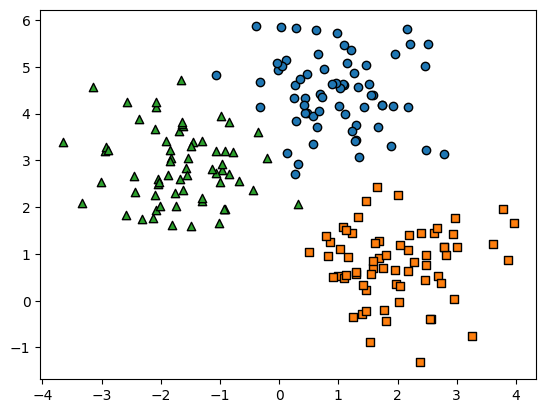

In [ ]:
target_list = np.unique(y)
# 각 타깃별 산점도의 마커 값.
markers=['o', 's', '^', 'P', 'D', 'H', 'x']
# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0, 1, 2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성.
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k',
                marker=markers[target] )

plt.show()

이렇게 만들어진 데이터 세트에 KMeans 군집화 수행한 뒤 군집별로 시각화

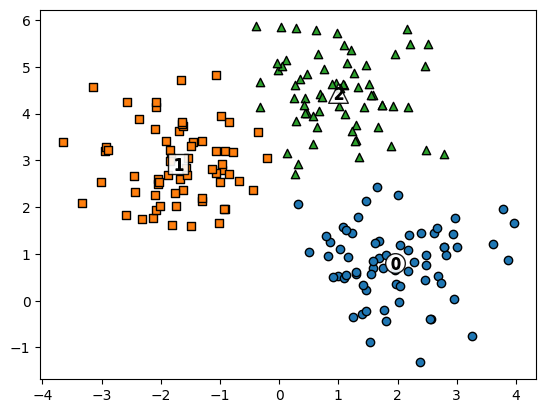

In [ ]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행.
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',
                marker=markers[label] )

    # 군집별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k',
                marker='$%d$' % label)

plt.show()


In [ ]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       2               66
        1                1
1       0               67
2       1               65
        0                1
Name: count, dtype: int64


## 7.2 군집 평가(Cluster Evaluation)

대부분의 군집화 데이터 세트는 비교할 만한 타깃 레이블을 가지고 있지 않다.

군집화의 성능을 평가하는 대표적인 방법: 실루엣 분석

### 실루엣 분석의 개요

실루엣 분석(silhouette analysis)
- 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지
- 다른 군집과의 거리는 떨어져 있고, 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있다.
- 군집화가 잘 될수록 개별 군집은 비슷한 정도의 여유공간을 가지고 떨어져 있을 것
- 실루엣 계수 기반

실루엣 계수(silhouette coefficient)
- 개별 데이터가 가지는 군집화 지표
- 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화돼 있고, 다른 군집에 있는 데이터와 얼마나 멀리 분리돼 있는지 나타냄

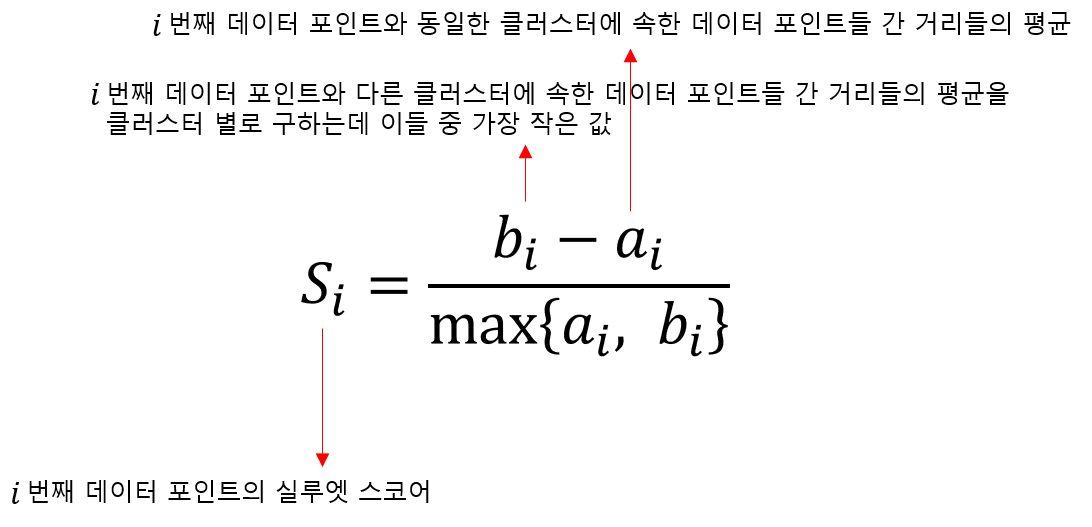

좋은 군집화 기준
- 전체 실루엣 계수의 평균값, 즉 사이킷런의 `silhouette_score()`은 0~1 사이의 값을 가지며, 1에 가까울수록 좋음
- 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 함

### 붓꽃 데이터 세트를 이용한 클러스터 평가

In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(irisDF)

irisDF['cluster'] = kmeans.labels_

# iris 의 모든 개별 데이터에 실루엣 계수값을 구함.
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

# irisDF에 실루엣 계수 컬럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함.
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

irisDF.head(3)

silhouette_samples( ) return 값의 shape (150,)
붓꽃 데이터셋 Silhouette Analysis Score:0.551


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852582
1,4.9,3.0,1.4,0.2,1,0.814916
2,4.7,3.2,1.3,0.2,1,0.828797


- 평균 실루엣 계수 값: 약 0.551
- irisDF의 맨 처음 3개 로우는 1번 군집에 해당하고 개별 실루엣 계수 값이 평균적으로 약 0.8 정도의 높으 실루엣 계수 값을 나타냄
- 하지만 1번 군집이 아닌 다른 군집의 경우 실루엣 계수 값이 낮기 때문에 전체 평균 실루엣 계수 값이 0.551 정도가 됨

군집별 평균 실루엣 계수 값 확인

In [ ]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

,silhouette_coeff
cluster,
0,0.422323
1,0.797604
2,0.436842


- 1번 군집에 비해 0번과 2번은 상대적으로 평균값이 낮다.

### 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법

- 전체 데이터의 평균 실루엣 계수 값이 높다고 해서 반드시 최적의 군집 개수로 군집화가 잘 됐다고 볼 수 없음
- 특정 군집 내의 실루엣 계수 값만 너무 높고, 다른 군집은 내부 데이터끼리의 거리가 너무 떨어져 있어 실루엣 계수 값이 낮아져도 평균적으로 높은 값을 가질 수 있음

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

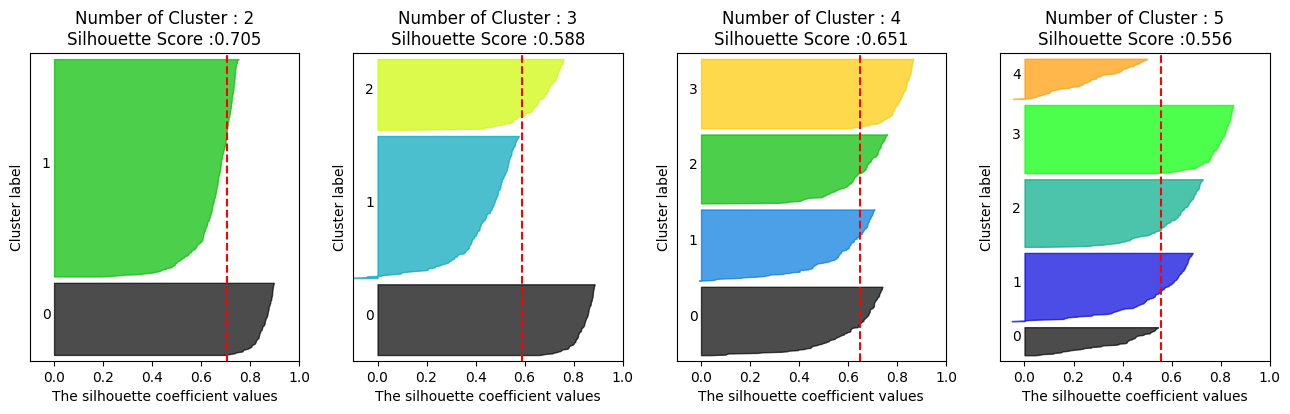

In [ ]:
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화
visualize_silhouette([ 2, 3, 4, 5], X)

- 점선: 전체 평균 실루엣 계수 값
- 첫 번째 경우 군집 2개로, 평균 실루엣 계수 silhouette score: 0.705로 높음. 0번 군집의 모든 데이터는 평균 실루엣 계수 값 이상이지만, 1번 군집의 경우 평균보다 적은 데이터 값이 매우 많다.

붓꽃 데이터 이용해 K-평균 수행 시 최적의 군집 개수 알아보기

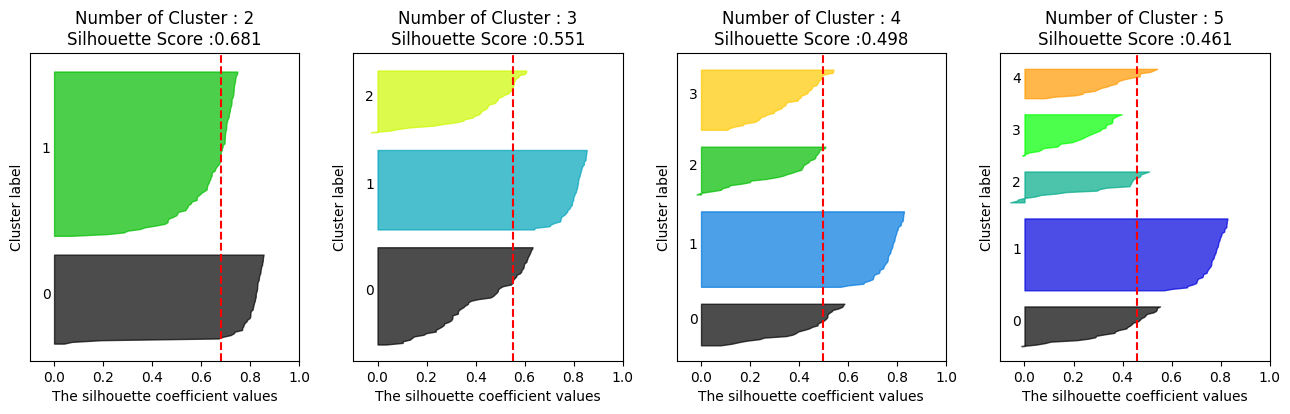

In [ ]:
from sklearn.datasets import load_iris

iris=load_iris()
visualize_silhouette([ 2, 3, 4, 5 ], iris.data)

- 군집 개수 2개가 가장 좋아 보임
- 3개의 경우 평균 실루엣 계수 값도 작을뿐더러 1번 군집과 다른 0번, 2번 군집과의 실루엣 계수의 편차가 큼

## 7.3 평균 이동

### 평균 이동(Mean Shift)의 개요

- K-평균과 유사하게 중심을 군집의 중심으로 지속적으로 움직이면서 군집화를 수행
- K-평균이 중심에 소속된 데이터의 평균 거리 중심으로 이동하는 데 반해, 평균 이동은 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동

평균 이동 군집화는 데이터의 분포도를 이용해 군집 중심점을 찾음
- 군집 중심점: 데이터 포인트가 모여 있는 곳 -> 확률 밀도 함수(Probability Density Function) 이용
- 가장 집중적으로 데이터가 모여 확률 밀도 함수가 피크인 점을 군집 중심점으로 선정
- 일반적으로 주어진 모델의 확률 밀도 함수를 찾기 위해 KDE(Kernel Density Estimation) 이용
- 특정 데이터를 반경 내의 데이터 분포 확률 밀도가 가장 높은 곳으로 이동하기 위해 주변 데이터와의 거리 값을 KDE 함수 값으로 입력한 뒤 그 반환 값을 현재 위치에서 업데이트하면서 이동하는 방식
- 전체 데이터에 반복적으로 적용하면서 군집 중심점 찾아냄

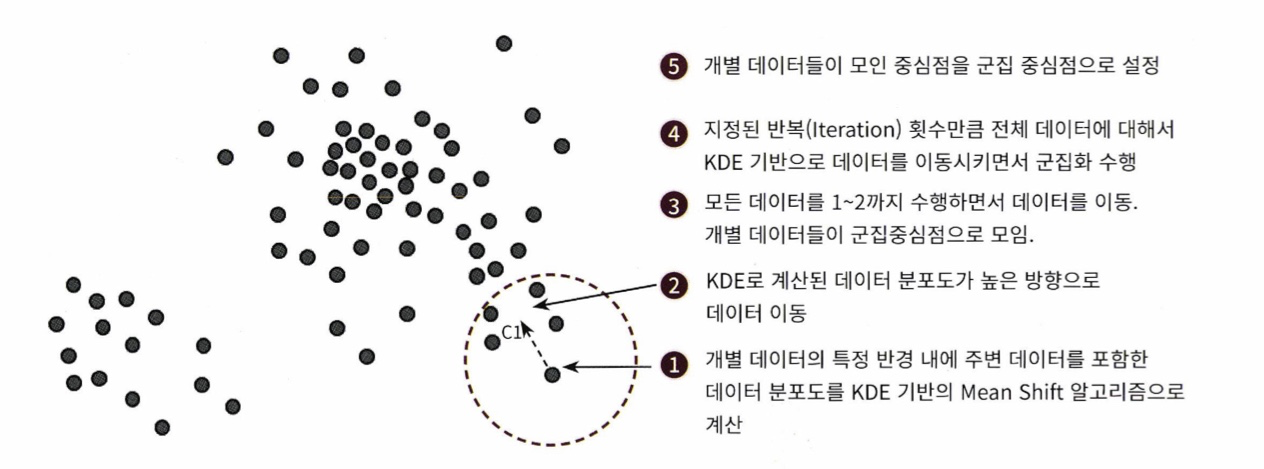

KDE: 커널 함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 대표적인 방법
- 관측된 데이터 각각에 커널 함수를 적용한 값을 모두 더한 뒤 데이터 건수로 나눠 확률 밀도 함수를 추정
- 개별 관측 데이터에 커널 함수 적용한 뒤 적용 값을 모두 더한 후 개별 관측 데이터의 건수로 나눠 확률 밀도 함수 추정
- 대표적인 커널 함수로서 가우시안 분포 함수가 사용됨

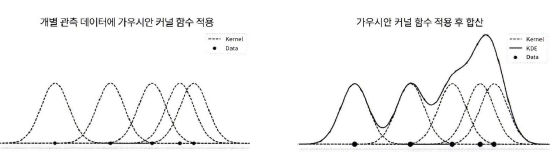

KDE는 다음과 같은 커널 함수식으로 표현됨
- K: 커널 함수, x: 확률 변숫값, xi: 관측값, h: 대역폭(bandwidth)

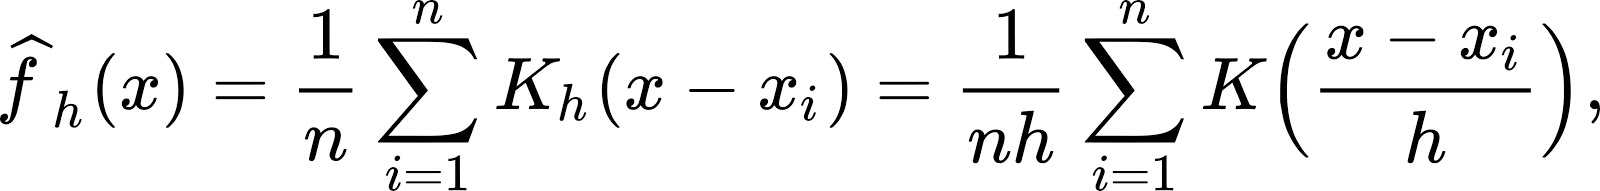

대역폭 h
- KDE 형태를 부드러운(또는 뾰족한) 형태로 평활화(Smoothing)하는 데 적용됨
- h 설정에 따라 확률 밀도 추정 성능 크게 좌우

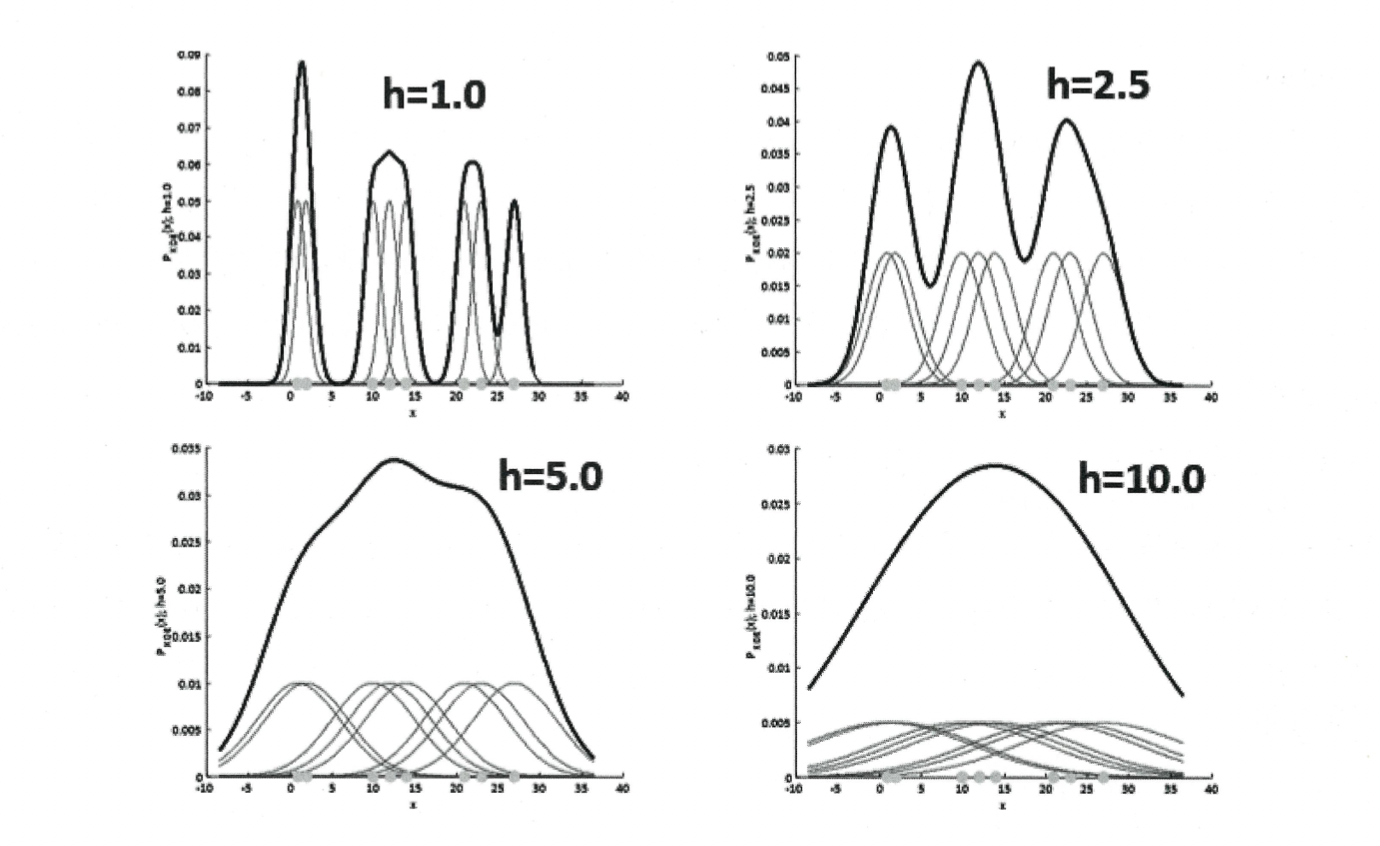

 h 값 증가시키면서 변화되는 KDE를 나타낸 것
 - 작은 h 값(h=1.0): 좁고 뾰족한 KDE, 변동성이 큰 방식으로 확률 밀도 함수 추정하므로 과적합하기 쉬움
 - 매우 큰 h 값(h=10): 과도하게 평활화된 KDE, 지나치게 단순화된 방식으로 확률 밀도 함수 추정하며 과소적합하기 쉬움

평균 이동 군집화는 대역폭이 클수록 평활화된 KDE로 인해 작은 수의 군집 중심점을 가지며 대역폭이 적을수록 많은 수의 군집 중심점을 가진다.

평균 이동 군집화는 군집의 개수를 지정하지 않으며, 오직 대역폭의 크기에 따라 군집화를 수행한다.

사이킷런의 `MeanShift` 클래스
- 중요 초기화 파라미터 `bandwidth`: KDE의 대역폭 h
- 대역폭 크기 설정이 군집화의 품질에 큰 영향을 미치기 때문에 사이킷런은 최적의 대역폭 계산을 위해 `estimate_bandwidth()` 함수 제공

다음 예제: `make_blobs()`의 `cluster_std`를 0.7로 정한 3개 군집의 데이터에 대해 `bandwidth`를 0.8로 설정한 평균 이동 군집화 알고리즘 적용

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3,
                  cluster_std=0.7, random_state=0)

meanshift= MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


- 군집 6개로 분류됨
- 지나치게 세분화돼 군집화됨
- bandwidth 작게 할수록 군집 개수 많아짐

In [ ]:
# bandwidth 살짝 높인 1.0으로
meanshift= MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


- 3개의 군집으로 군집화됨

최적화된 bandwidth 값 찾기

In [ ]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.816


In [ ]:
import pandas as pd


clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift= MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


- `estimate_bandwidth()`로 측정된 `bandwidth`를 평균 이동 입력값으로 적용해 군집화 수행한 결과 3개의 군집으로 구성됨

구성된 3개의 군집 시각화

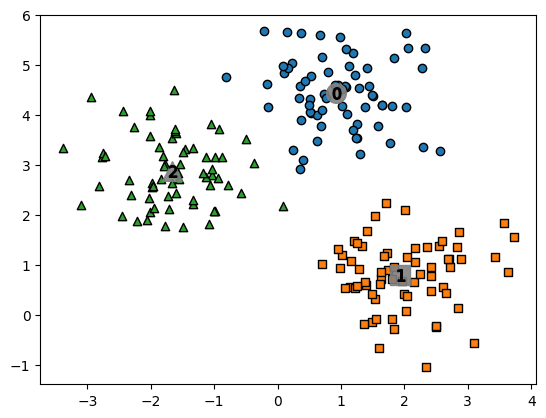

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label] )

    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)

plt.show()

target 값과 군집 label 값 비교

In [ ]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: count, dtype: int64


- target 값과 군집 label 값이 1:1로 잘 매칭됨

평균 이동 정리
- 데이터 세트의 형태를 특정 형태로 가정한다든가, 특정 분포도 기반의 모델로 가정하지 않기 때문에 좀 더 유연한 군집화가 가능
- 이상치의 영향력 크지 않음
- 미리 군집의 개수 정할 필요 없음
- 알고리즘 수행 시간 오래 걸림
- bandwidth 크기에 따른 군집 영향도가 매우 큼
- 일반적으로 분석 업무 기반의 데이터 세트보다 컴퓨터 비전 영역에서 더 많이 사용됨
- 이미지나 영상 데이터에서 특정 개체를 구분하거나 움직이믕ㄹ 추적하는 데 뛰어난 역할 수행

## 7.4 GMM(Gaussian Mixture Model)

### GMM(Gaussian Mixture Model) 소개

GMM 군집화
- 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포(Gaussian Distribution)를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행하는 방식
- 가우시안 분포: 정규 분포(Normal distribution)으로도 알려짐. 좌우 대칭형의 종(Bell) 형태를 가진 연속 확률 함수
- GMM은 데이터를 여러 개의 가우시안 분포가 섞인 것으로 간주
- 섞인 데이터 분포에서 개별 유형의 가우시안 분포 추출

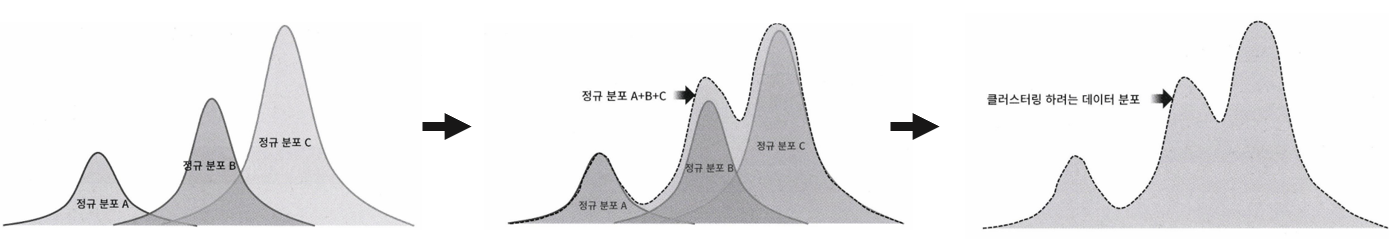

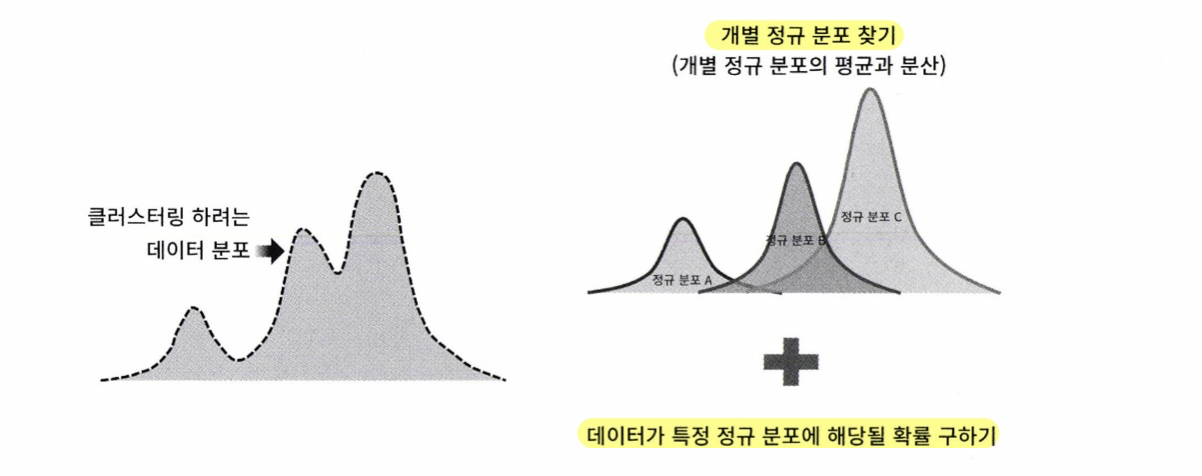

GMM에서 모수 추정
- 개별 정규 분포의 평균과 분산
- 각 데이터가 어떤 정규 분포에 해당되는지의 확률
- 이러한 모수 추정을 위해 GMM은 EM(Expectation and Maximization) 방법 적용
- 사이킷런 `GaussianMixture` 클래스 지원

### GMM 을 이용한 붓꽃 데이터 세트 군집화

GMM은 확률 기반 군집화이고 K-평균은 거리 기반 군집화

붓꽃 데이터 세트로 두 가지 방식 이용해 군집화 수행한 뒤 양쪽 방식 비교

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
# n_components: gaussian mixture 모델의 총 개수
gmm_cluster_labels = gmm.predict(iris.data)

# 클러스터링 결과를 irisDF 의 'gmm_cluster' 컬럼명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

# target 값에 따라서 gmm_cluster 값이 어떻게 매핑되었는지 확인.
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       1              50
1       0              45
        2               5
2       2              50
Name: count, dtype: int64


- Target 0은 cluster 1로, Target 2는 cluster 2로 모두 잘 매핑됨
- Target 1만 cluster 0으로 45개(90%), cluster 2로 5개(10%) 매핑됨
- 앞 절의 붓꽃 데이터 세트의 K-평균 군집화 결과보다 효과적인 분류 결과 도출됨

붓꽃 데이터 세트의 K-평균 군집화 수행 결과

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 47
        2                  3
2       2                 36
        0                 14
Name: count, dtype: int64


- 어떤 알고리즘이 더 뛰어나다는 의미가 아니라 붓꽃 데이터 세트가 GMM 군집화에 더 효과적이라는 의미
- K-평균은 평균 거리 중심으로 중심을 이동하면서 군집화를 수행하는 방식이므로 개별 군집 내의 데이터가 원형으로 흩어져 있는 경우에 매우 효과적으로 군집화가 수행될 수 있음

### GMM과 K-평균의 비교

In [ ]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
  # clusterobj: 사이킷런의 군집 수행 각체. KMeans나 GaussianMixture의 fit()와 predict()로 군집화를 완료한 객체. 만약 make_blobs()로 생성한 데이터의 시각화일 경우 None
  # dataframe: 피처 데이터 세트와 label 값을 가진 DataFrame
  # label_name: 군집화 결과 시각화일 경우 dataframe 내의 군집화 label 칼럼명, make_blobs() 결과 시각화일 경우 dataframe 내의 target 칼럼명
  # iscenter: 사이킷런 Cluster 객체가 군집 중심 좌표를 제공하면 True, 그렇지 않으면 False
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

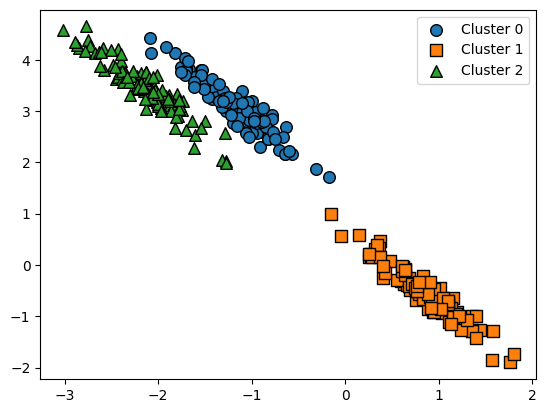

In [ ]:
from sklearn.datasets import make_blobs

# make_blobs() 로 300개의 데이터 셋, 3개의 cluster 셋, cluster_std=0.5 을 만듬.
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 셋을 생성하기 위해 변환함.
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
# feature 데이터 셋과 make_blobs( ) 의 y 결과 값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
# 생성된 데이터 셋을 target 별로 다른 marker 로 표시하여 시각화 함.
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

- 위와 같이 만들어진 데이터 세트에서는 KMeans의 군집화 정확성이 떨어짐

KMeans가 위 데이터 세트를 어떻게 군집화하는지 확인

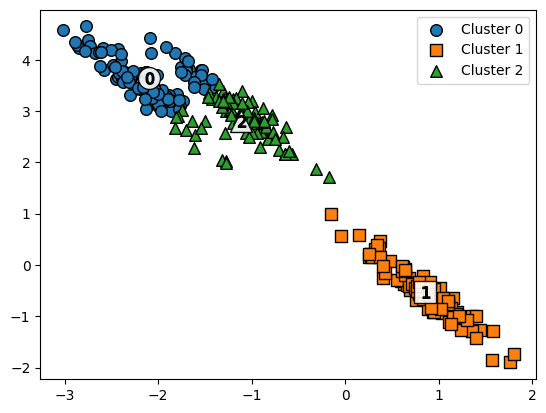

In [ ]:
# 3개의 Cluster 기반 Kmeans 를 X_aniso 데이터 셋에 적용
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label',iscenter=True)

- KMeans로 군집화 수행할 경우, 주로 원형 영역 위치로 개별 군집화가 되면서 원하는 방향으로 구성되지 않음

GMM으로 군집화 수행

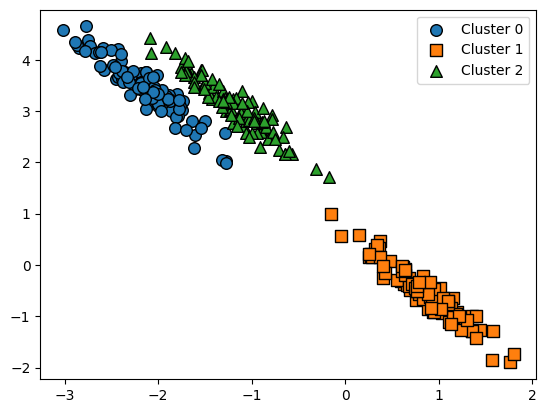

In [ ]:
# 3개의 n_components기반 GMM을 X_aniso 데이터 셋에 적용
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정.
visualize_cluster_plot(gmm, clusterDF, 'gmm_label',iscenter=False)

- 데이터가 분포된 방향에 따라 정확하게 군집화됨
- GMM은 K-평균과 다르게 군집의 중심 좌표를 구할 수 없기 때문에 군집 중심 표현이 시각화되지 않음

`make_blobs()`의 target 값과 KMeans, GMM의 군집 Label 값을 서로 비교해 위와 같은 데이터 세트에서 얼만큼의 군집화 효율 차이가 발생하는지 확인

In [ ]:
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: count, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: count, dtype: int64


- KMeans: 군집 1번만 정확히 매핑되고, 나머지 경우 target 값과 어긋나는 경우 발생
- GMM: 군집이 target 값과 잘 매핑됨